Question 1

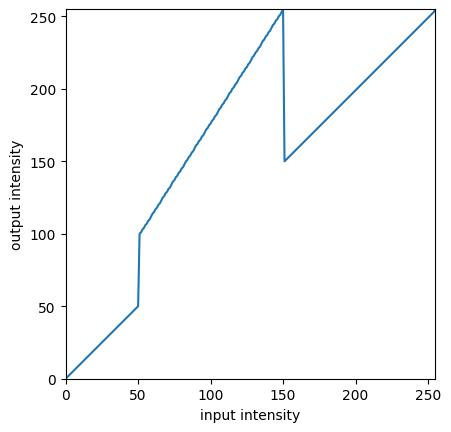

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(50,50),(51,100),(150,255),(151,150),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Emma Image', cv.WINDOW_NORMAL)
cv.imshow('Emma Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.a white matter


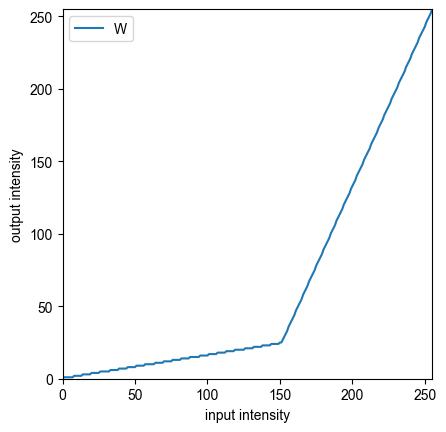

[  0   1   1   1   1   1   1   1   2   2   2   2   2   2   3   3   3   3
   3   3   4   4   4   4   4   4   5   5   5   5   5   5   5   6   6   6
   6   6   6   7   7   7   7   7   7   8   8   8   8   8   8   9   9   9
   9   9   9  10  10  10  10  10  10  10  11  11  11  11  11  11  12  12
  12  12  12  12  13  13  13  13  13  13  14  14  14  14  14  14  15  15
  15  15  15  15  15  16  16  16  16  16  16  17  17  17  17  17  17  18
  18  18  18  18  18  19  19  19  19  19  19  20  20  20  20  20  20  20
  21  21  21  21  21  21  22  22  22  22  22  22  23  23  23  23  23  23
  24  24  24  24  24  24  25  25  27  29  31  33  36  38  40  42  44  47
  49  51  53  55  58  60  62  64  67  69  71  73  75  78  80  82  84  86
  89  91  93  95  97 100 102 104 106 109 111 113 115 117 120 122 124 126
 128 131 133 135 137 140 142 144 146 148 151 153 155 157 159 162 164 166
 168 170 173 175 177 179 182 184 186 188 190 193 195 197 199 201 204 206
 208 210 212 215 217 219 221 224 226 228 230 232 23

In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(150,25),(151,25),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('White matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

#print(transform)

transf = cv.LUT(img, transform)
cv.namedWindow('White matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('White matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 2.b Gray matter enhanced

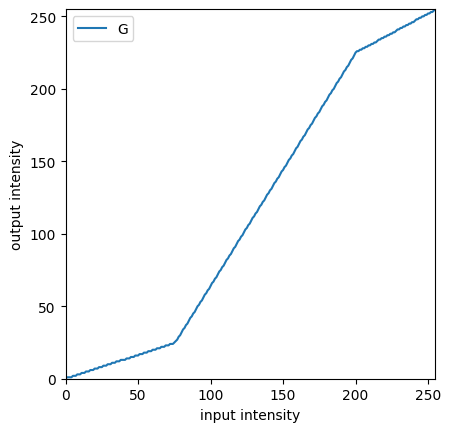

In [52]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

points = np.array([(1,1),(75,25),(76,26),(200,225),(201,226),(255,255)])
#print(len(points))
transform = np.linspace(0,0,1)

for i in range(0,int(len(points)/2)):
    t1 = np.linspace(points[0+2*i,1], points[1+2*i,1], points[1+2*i,0]-points[0+2*i,0]+1)
    transform = np.concatenate((transform , t1), axis=0).astype('uint8')
    #print(len(t1))
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('input intensity')  #, $f(\mathbf{x})$' 
ax.set_ylabel('output intensity') #, $\\mathrm{T}[f(\mathbf{x})]$
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.legend('Gray matter enhancement')
plt.savefig('transform1.png')
plt.show()

img = cv.imread('../BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow('Brain Image', cv.WINDOW_NORMAL)
cv.imshow('Brain Image', img)
cv.waitKey(0)

transf = cv.LUT(img, transform)
cv.namedWindow('Gray matter enhanced Image', cv.WINDOW_NORMAL)
cv.imshow('Gray matter enhanced Image', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 3 

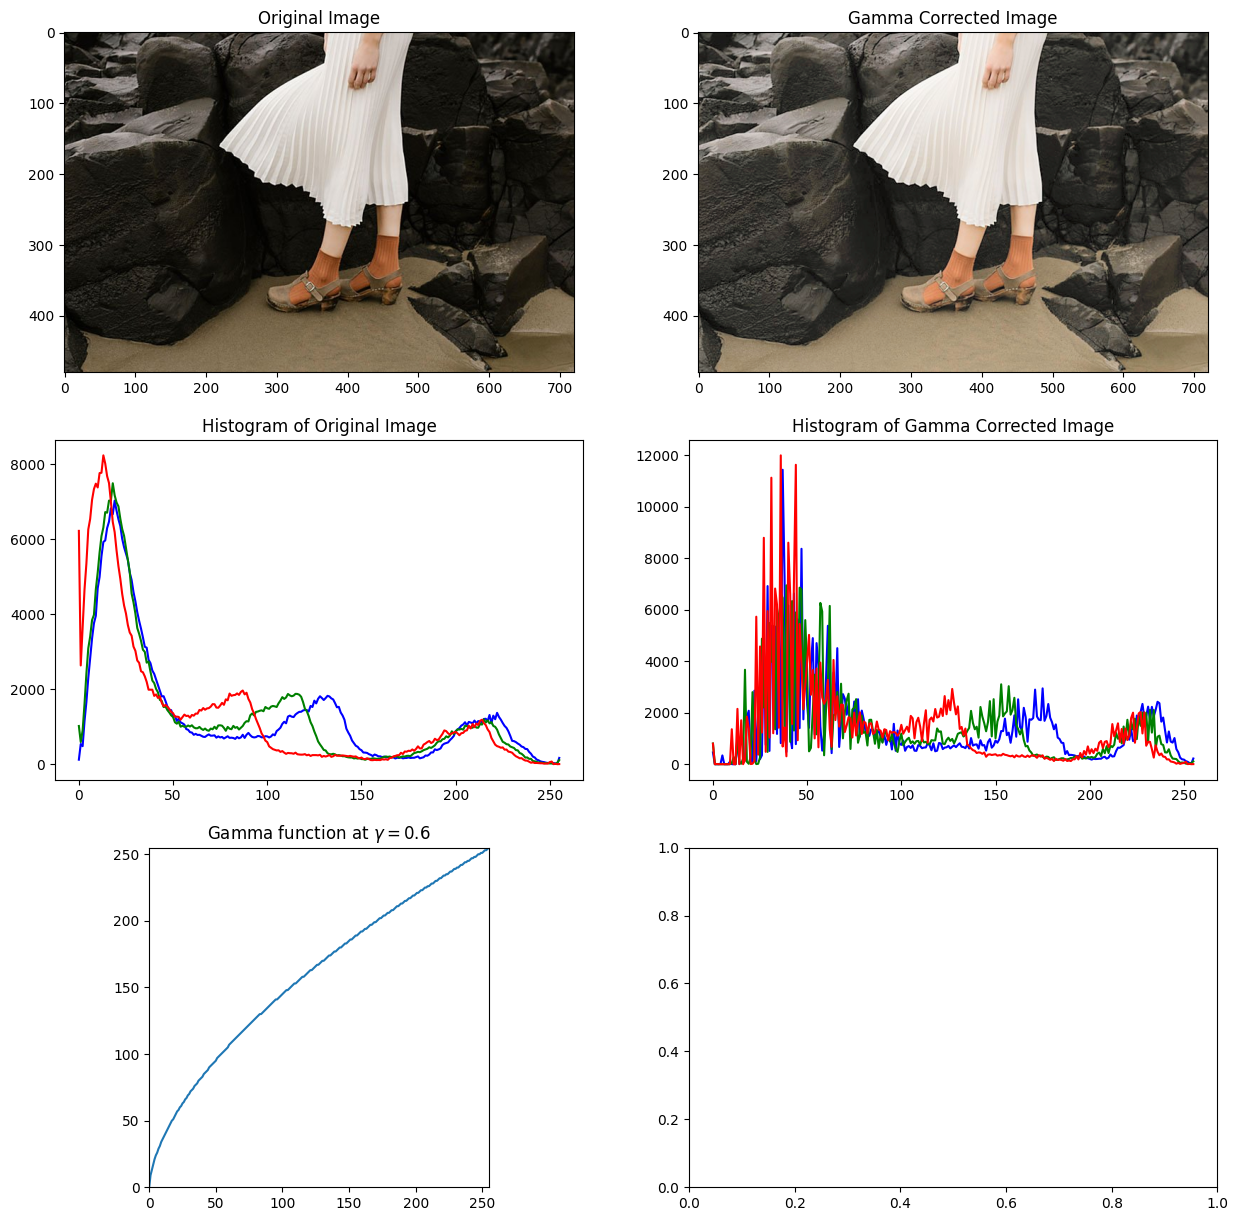

In [56]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../highlights_and_shadows.jpg', cv.IMREAD_COLOR)
gamma = 0.6
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')

img_p = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
l_img, a_img, b_img = cv.split(img_p)
l_updated = cv.LUT(l_img, table)
img_gamma = cv.merge((l_updated,a_img,b_img))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

f, axarr = plt.subplots(3, 2, figsize=(15,15))
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Gamma Corrected Image')

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

axarr[1, 0].set_title('Histogram of Original Image')
axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[2, 0].plot(table)
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')
axarr[2, 0].set_title('Gamma function at $\gamma = {g}$'.format(g=gamma))

plt.show()


Question 4

Value of a is  0.8


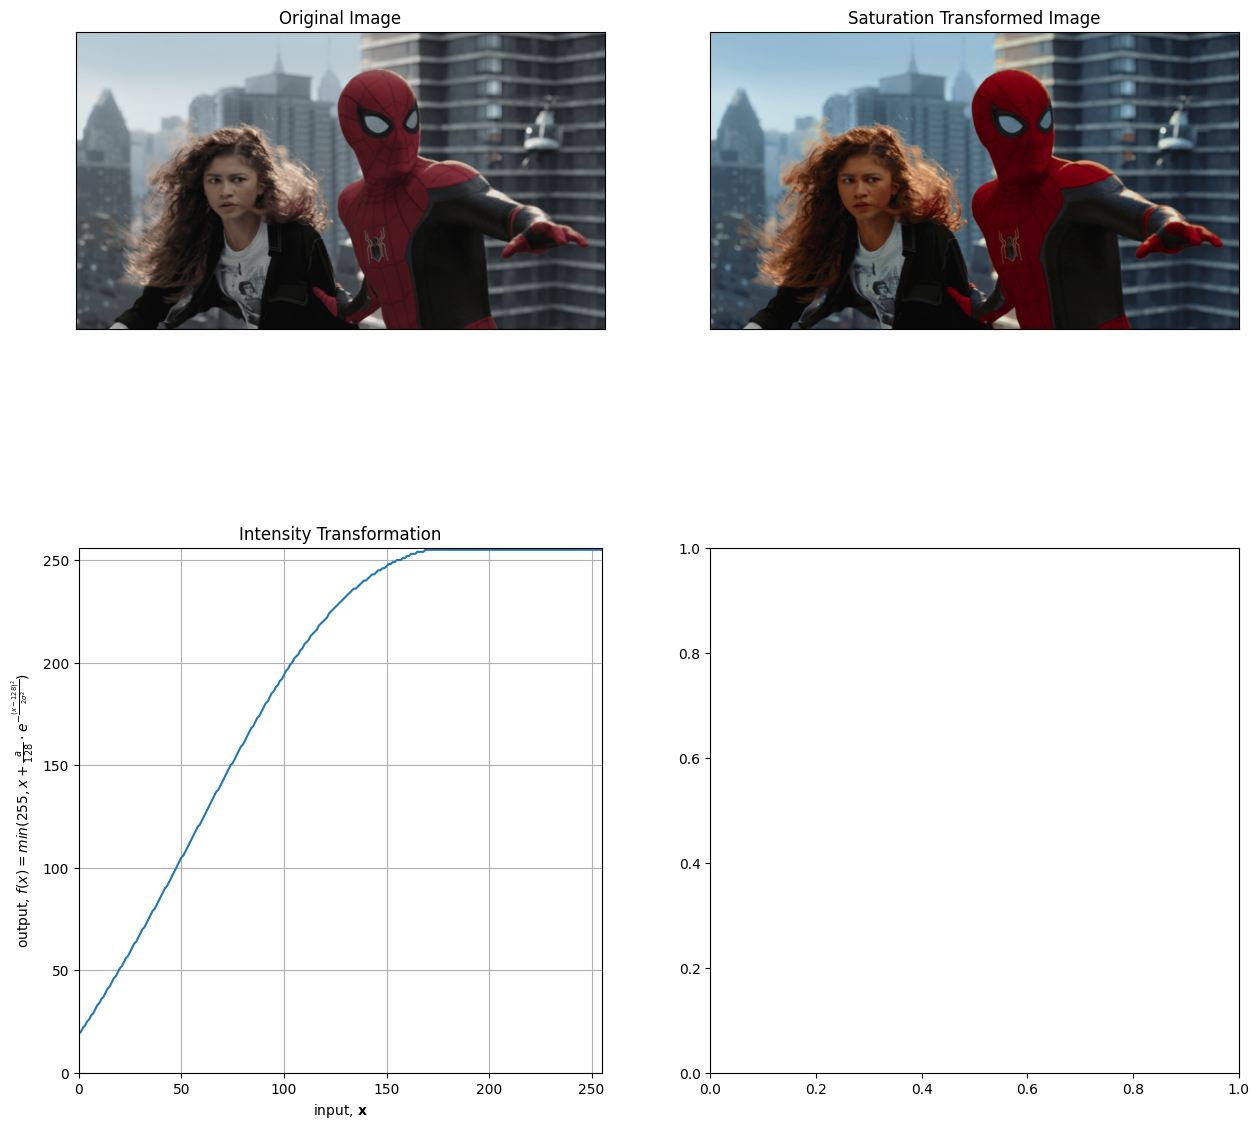

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math



img_orig = cv.imread('../spider.png', cv.IMREAD_COLOR)
sigma = 70
a = 0.8
def fn(x):
    return int(min(255,x+(a*128)*np.exp(-((x-128)**2)/(2*(sigma**2)))))
img_o = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_cvt = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(img_cvt)

#print(s_img)

for i in range(len(s_img)):
    for j in range(len(s_img[0])):
        s_img[i][j] = fn(s_img[i][j])

img_edited = cv.merge((h_img, s_img, v_img))
img = cv.cvtColor(img_edited, cv.COLOR_HSV2RGB)

print('Value of a is ',a)

f, axarr = plt.subplots(2, 2, figsize=(15,15))
axarr[0, 0].imshow(img_o)
axarr[0, 1].imshow(img)
axarr[0, 0].set_xticks([])
axarr[0, 0].set_yticks([])
axarr[0, 0].set_title('Original Image')
axarr[0, 1].set_title('Saturation Transformed Image')
axarr[0, 1].set_xticks([])
axarr[0, 1].set_yticks([])

table = np.array([fn(i) for i in np.arange(0, 256)]).astype('uint8')
#print(fn(100))

axarr[1, 0].set_title('Intensity Transformation')
#axarr[1, 1].set_title('Histogram of Gamma Corrected Image')

axarr[1, 0].plot(table)
axarr[1, 0].grid()
axarr[1, 0].set_xlim(0, 255)
axarr[1, 0].set_ylim(0, 256)
axarr[1, 0].set_aspect('equal')
axarr[1, 0].set_xlabel('input, $\mathbf{x}$')
axarr[1, 0].set_ylabel(r'output, $f(x) = min(255, x + \frac{a}{128} \cdot e^{-\frac{(x - 128)^2}{2\sigma^2}})$')
#ax.set_title(r'$f(x) = \min(255, x + \frac{a}{128} \cdot e^{-\frac{(x - 128)^2}{2\sigma^2}})$')

plt.show()


Question 5

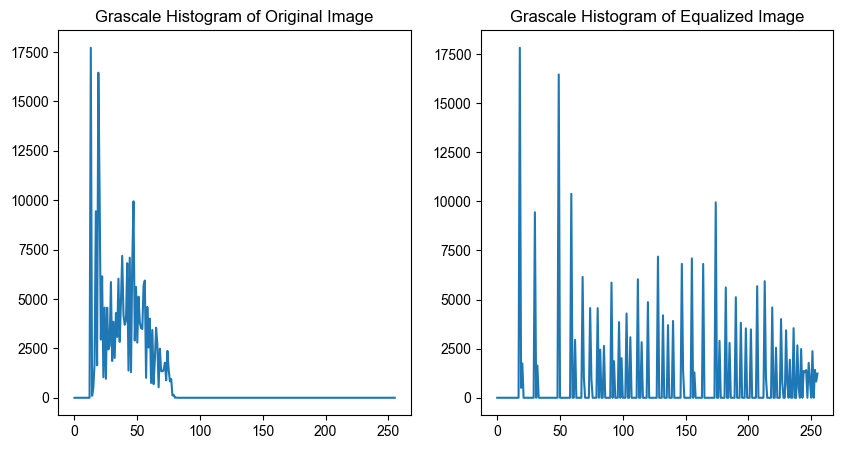

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../shells.tif', cv.IMREAD_GRAYSCALE)

def histogram_equalization(img_orig):
    histogram = np.zeros(256)
    cumilative = np.zeros(256)
    h,w = img_orig.shape #height and width
    pixels = img_orig.size
    #print(pixels)

    for i in range(h):
        for j in range(w):
            histogram[img_orig[i][j]] += 1

    cumilative[0] = histogram[0]
    for i in range(1,256):
        cumilative[i] = cumilative[i-1] + histogram[i]

    for i in range(256):
        cumilative[i] = cumilative[i]/pixels*255

    table = [np.clip(round(number), 0, 255).astype(np.uint8) for number in cumilative]
    #print(type(cumilative))
    img_done = cv.LUT(img_orig, np.array(table))

    return img_done

fig, axarr = plt.subplots(1, 2, figsize = (10,5))
hist_orig = cv.calcHist([img_orig], [0], None, [256], [0,256])
axarr[0].plot(hist_orig)
axarr[0].set_title('Grascale Histogram of Original Image')

hist_orig = cv.calcHist([histogram_equalization(img_orig)], [0], None, [256], [0,256])
axarr[1].plot(hist_orig)
axarr[1].set_title('Grascale Histogram of Equalized Image')

cv.namedWindow('Original', cv.WINDOW_NORMAL)
cv.imshow('Original', img_orig)
cv.waitKey(0)

transf = histogram_equalization(img_orig)
cv.namedWindow('After Equalization', cv.WINDOW_NORMAL)
cv.imshow('After Equalization', transf)
cv.waitKey(0)
cv.destroyAllWindows()



Question 6

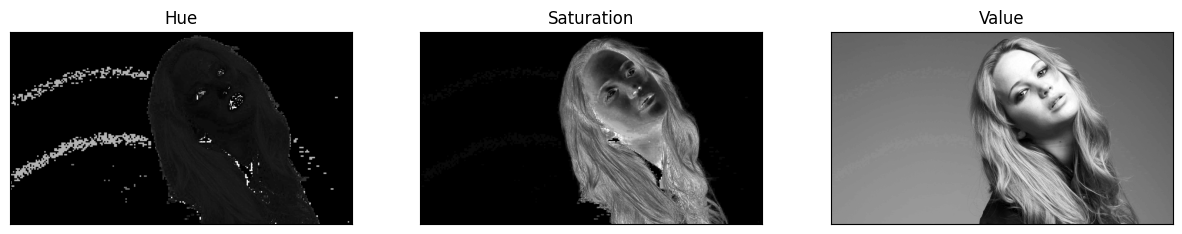

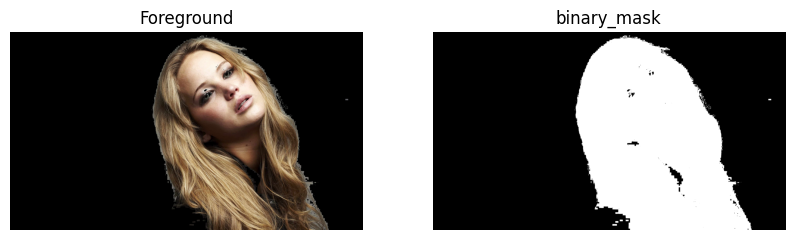

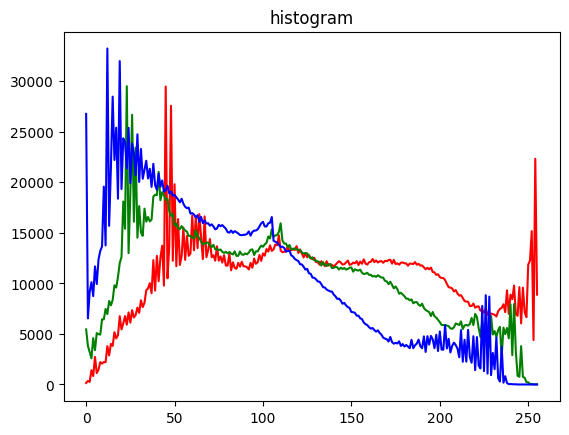

[2728920.]


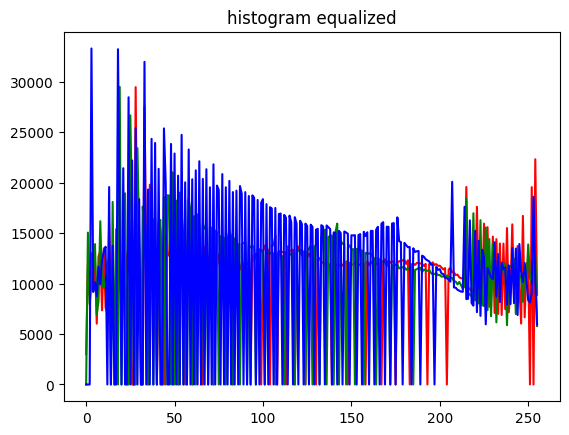

(-0.5, 3839.5, 2159.5, -0.5)

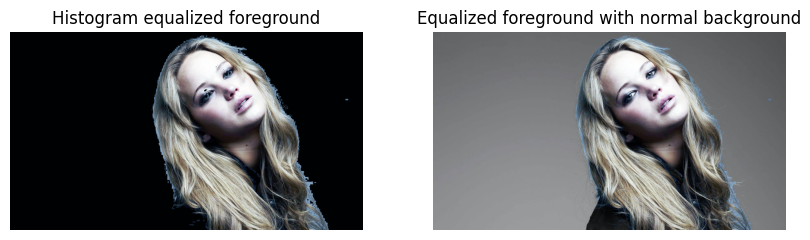

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('../jeniffer.jpg', cv.IMREAD_COLOR)
img_col = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)


img_cvt = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(img_cvt)
fig, ax = plt.subplots(1,3, figsize = (15,15))
ax[0].imshow(h_img, cmap='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Hue')

ax[1].imshow(s_img, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Saturation')

ax[2].imshow(v_img, cmap='gray')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Value')

plt.show()

threshold_value = 11
_, binary_img = cv.threshold(s_img, threshold_value, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(img_col, img_col, mask=binary_img).astype(np.uint8)
img_R, img_G, img_B = cv.split(foreground)


fig, ax = plt.subplots(1,2, figsize=(10, 10))
ax[0].imshow(foreground)
ax[0].set_title('Foreground')
ax[0].axis('off')

ax[1].imshow(binary_img, cmap = 'gray')
ax[1].set_title('binary_mask')
ax[1].axis('off')

plt.show() 

histograms = []
color = ('r', 'g', 'b')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([foreground], [i], binary_img, [256], [0, 256])
    plt.plot(hist_orig, color=c)
    plt.title('histogram')
    histograms.append(hist_orig)

plt.show()

cumilative = np.cumsum(histograms, axis=1)
#print(len(histograms[0]))
print(cumilative[0][255])

for i in range(256):
    # for 'r'
    cumilative[0][i] = cumilative[0][i] * 255 / cumilative[0][255]
    cumilative[0][i] = np.clip(np.round(cumilative[0][i]), 0, 255).astype(np.uint8)
    
    # for 'g'
    cumilative[1][i] = cumilative[1][i] * 255 / cumilative[1][255]
    cumilative[1][i] = np.clip(np.round(cumilative[1][i]), 0, 255).astype(np.uint8)
    
    # for 'b'
    cumilative[2][i] = cumilative[2][i] * 255 / cumilative[2][255]
    cumilative[2][i] = np.clip(np.round(cumilative[2][i]), 0, 255).astype(np.uint8)

img_R = cv.LUT(img_R, np.array(cumilative[0]))
img_G = cv.LUT(img_G, np.array(cumilative[1]))
img_B = cv.LUT(img_B, np.array(cumilative[2]))

#print(cumilative[0])


image = cv.merge((img_R, img_G, img_B)).astype(np.uint8)

color = ('r', 'g', 'b')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([image], [i], binary_img, [256], [0, 256],)
    plt.plot(hist_orig, color=c)
    plt.title('histogram equalized')
    #histograms.append(hist_orig)

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(image)
ax[0].set_title('Histogram equalized foreground')
ax[0].axis('off')

background = (img_col - foreground)
eddited_img = (background + image)
ax[1].imshow(eddited_img)
ax[1].set_title("Equalized foreground with normal background")
ax[1].axis('off')


array([255.], dtype=float32)

Question 7 - a

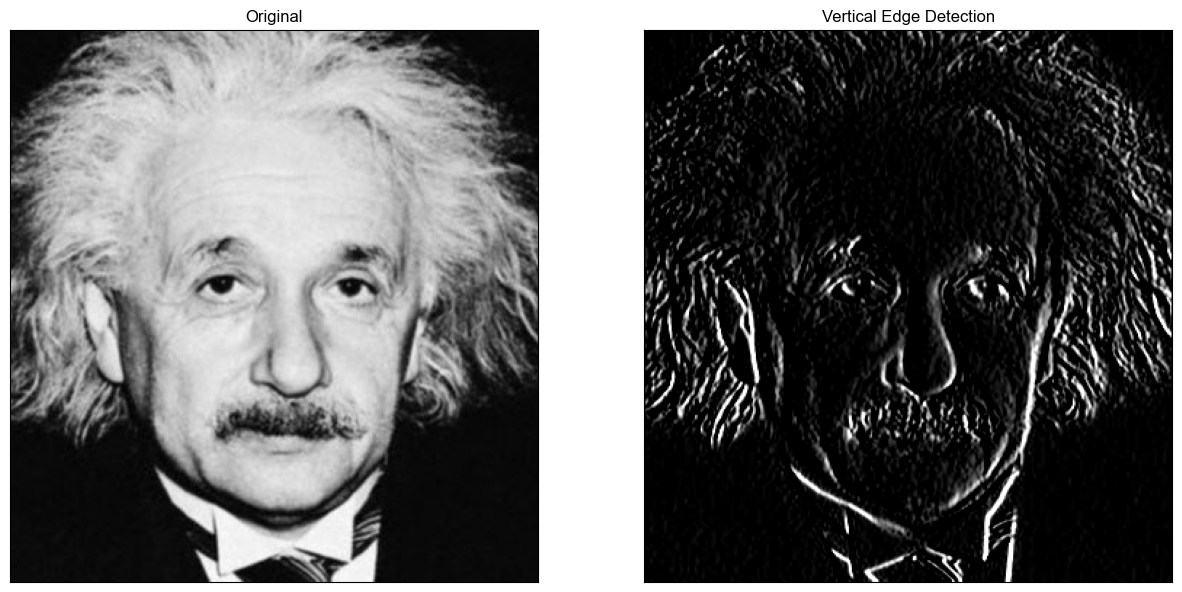

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('../einstein.png', cv.IMREAD_GRAYSCALE)

# Define a kernel
kernel = np.array([
    (1, 0, -1),
    (2, 0, -2),
    (1, 0, -1)
], dtype='float32')

# Apply 2D filtering with the defined kernel
imgc = cv.filter2D(img, -1, kernel)

# Create a subplot with two images
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(15, 15))

# Display the original image on the first subplot
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

# Display the filtered image on the second subplot
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Show the plots
plt.show()

Question 7 - b

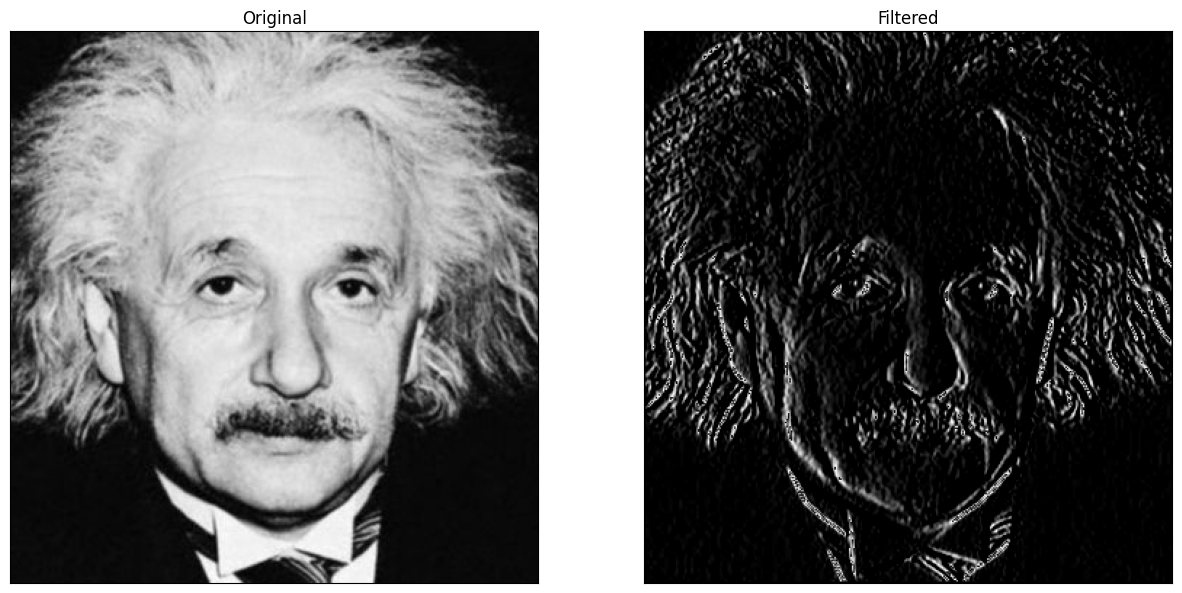

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

def k_filter(image, kernel):
    h,w = image.shape[:2]
    k_h,k_w = kernel.shape[0], kernel.shape[1]
    assert k_h%2 == 1 and k_w%2 == 1, "Kernel is not accurate please check it"
    h_start, w_start = math.floor(k_h/2), math.floor(k_w/2)

    normalized_image = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    kernel_sum = np.sum(kernel)
    normalized_kernel = kernel #/ kernel_sum
    result = np.zeros(image.shape, dtype='float')

    #for convolution
    normalized_kernel = np.flipud(np.fliplr(normalized_kernel))

    for i in range(h_start, h-h_start):
        for j in range(w_start, w-w_start):
            result[i][j] = max(0,min(255.0,np.dot(normalized_image[i-h_start : i+h_start+1, j-w_start: j+w_start+1].flatten(), normalized_kernel.flatten())))
    #print(image)
    #print(result)
    result = 255.0 * result
    answer = result.astype(np.uint8)
    return answer


img = cv.imread('../einstein.png', cv.IMREAD_GRAYSCALE)

# Define a kernel
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], dtype='float')


f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
axarr[0].set_xticks([]), axarr[0].set_yticks([])


axarr[1].imshow(k_filter(img, kernel), cmap="gray")
axarr[1].set_title('Filtered')
axarr[1].set_xticks([]), axarr[1].set_yticks([])

plt.show()




Question 8

Question 9